In [1]:
# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (5, 5) # this controls figure size in the notebook

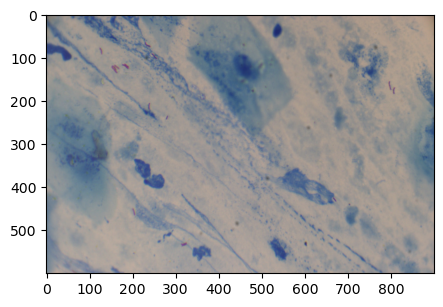

In [2]:
image=cv2.imread('data/bacillus/22727.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

In [3]:
import json
annot_file_name = "data/bacillus/22727.json"
with open(annot_file_name, 'r') as json_file:
    data = json.load(json_file)
data

{'imagewidth': 900,
 'imageHeight': 600,
 'FilterParameters': None,
 'focusValue': 0.0,
 'systemAddedAnnotations': [],
 'userAddedAnnotations': [{'id': 0,
   'width': 28.0,
   'height': 29.0,
   'top': 69.0,
   'left': 109.0,
   'addedType': 'U',
   'isDeleted': False,
   'ObjectType': 'Bacilli'},
  {'id': 0,
   'width': 25.0,
   'height': 33.0,
   'top': 195.0,
   'left': 224.0,
   'addedType': 'U',
   'isDeleted': False,
   'ObjectType': 'Bacilli'},
  {'id': 0,
   'width': 28.0,
   'height': 29.0,
   'top': 444.0,
   'left': 190.0,
   'addedType': 'U',
   'isDeleted': False,
   'ObjectType': 'Bacilli'},
  {'id': 0,
   'width': 39.0,
   'height': 32.0,
   'top': 518.0,
   'left': 299.0,
   'addedType': 'U',
   'isDeleted': False,
   'ObjectType': 'Bacilli'},
  {'id': 0,
   'width': 18.0,
   'height': 21.0,
   'top': 227.0,
   'left': 272.0,
   'addedType': 'U',
   'isDeleted': False,
   'ObjectType': 'Bacilli'},
  {'id': 0,
   'width': 26.0,
   'height': 23.0,
   'top': 416.0,
   'lef

In [4]:
data['userAddedAnnotations']

[{'id': 0,
  'width': 28.0,
  'height': 29.0,
  'top': 69.0,
  'left': 109.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 25.0,
  'height': 33.0,
  'top': 195.0,
  'left': 224.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 28.0,
  'height': 29.0,
  'top': 444.0,
  'left': 190.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 39.0,
  'height': 32.0,
  'top': 518.0,
  'left': 299.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 18.0,
  'height': 21.0,
  'top': 227.0,
  'left': 272.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 26.0,
  'height': 23.0,
  'top': 416.0,
  'left': 657.0,
  'addedType': 'U',
  'isDeleted': False,
  'ObjectType': 'Bacilli'},
 {'id': 0,
  'width': 48.0,
  'height': 60.0,
  'top': 53.0,
  'left': 221.0,
  'addedType': 'U',
  'isDele

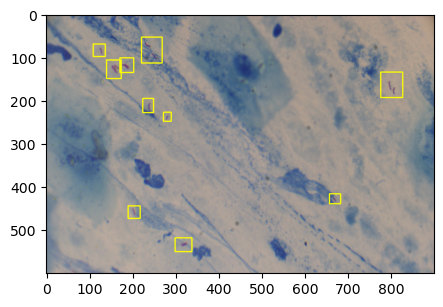

In [5]:
to_show = image.copy()
for r in data['userAddedAnnotations']:
    t, l, w, h = int(r['top']), int(r['left']), int(r['width']), int(r['height']) 
    cv2.rectangle(to_show, (l, t), (l+w, t+h), (255, 255, 0), 2)
    
plt.imshow(to_show)
plt.show()

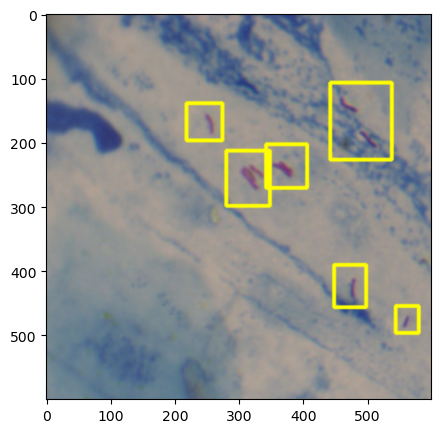

In [6]:
# Zoom a region
region = to_show[:300, :300]
region = cv2.resize(region, (600, 600))
plt.imshow(region)
plt.show()

## Detect bacillus

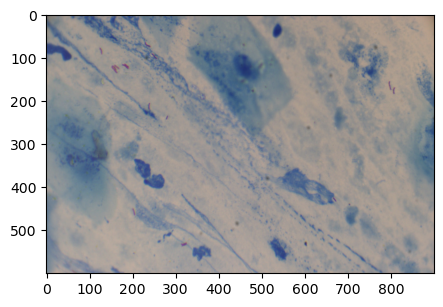

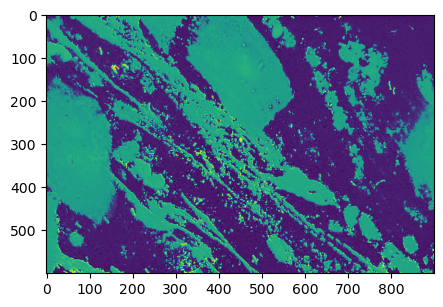

In [7]:
transformed = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h, s, v=cv2.split(transformed)
plt.imshow(image)
plt.show()
plt.imshow(h)

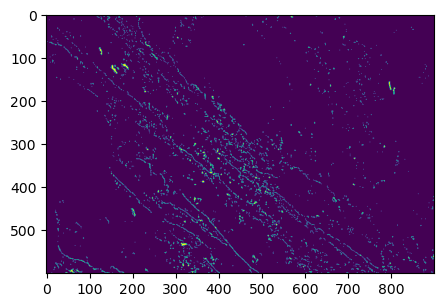

In [8]:
is_bacillus = cv2.inRange(h, 130, 160)
plt.imshow(is_bacillus)

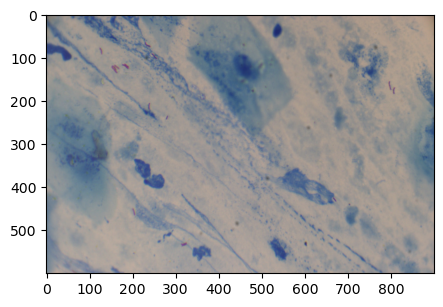

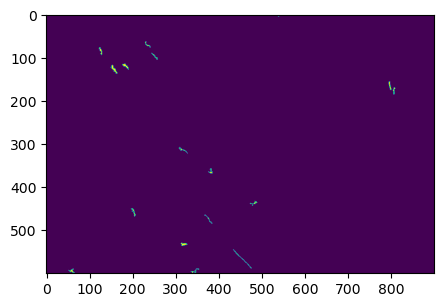

In [9]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(is_bacillus, connectivity=8)

# Define los valores mínimo y máximo para el número de elementos en una componente conectada
min_area = 30  # Valor mínimo
max_area = 300  # Valor máximo

# Itera sobre las etiquetas
for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        # La componente conectada está dentro del rango deseado
        continue
    else:
        # Elimina la componente conectada configurando todos los píxeles en 0
        is_bacillus[labels == label] = 0

plt.imshow(image)
plt.show()
plt.imshow(is_bacillus)

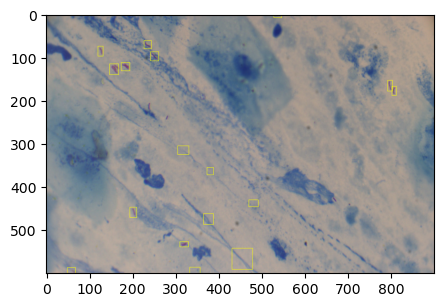

In [10]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(is_bacillus, connectivity=8)

# Define los valores mínimo y máximo para el número de elementos en una componente conectada
min_area = 30  # Valor mínimo
max_area = 300  # Valor máximo

boxes = []

# Itera sobre las etiquetas
for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    if min_area <= area <= max_area:
        left = stats[label, cv2.CC_STAT_LEFT]
        top = stats[label, cv2.CC_STAT_TOP]
        width = stats[label, cv2.CC_STAT_WIDTH]
        height = stats[label, cv2.CC_STAT_HEIGHT]
        boxes.append((left, top, width, height))
        # La componente conectada está dentro del rango deseado
        continue
    else:
        # Elimina la componente conectada configurando todos los píxeles en 0
        is_bacillus[labels == label] = 0

delta = 3
to_show = image.copy()
for l, t, w, h in boxes:
    cv2.rectangle(to_show, (l-delta, t-delta, w+2*delta, h+2*delta), (255, 255, 0), 1)
plt.imshow(to_show)


Is there a parameter combination that performs better with most images?

You need first to label many images, so you can automatically evaluate configurations, and use gradient descent on the parameters??